In [36]:
# import all the necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [37]:
# pip install numpy==1.22.0

In [38]:
#get the train data

data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [39]:
class_distribution = data['total_amount'].value_counts()
print(class_distribution)

total_amount
16.80     1787
12.60     1648
18.00     1515
21.00     1490
19.80     1260
          ... 
23.64        1
130.65       1
40.46        1
79.97        1
57.43        1
Name: count, Length: 8164, dtype: int64


In [40]:
##Get the test data
test_data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
test_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [41]:
# get the sample dataset
sample_data = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv")
sample_data.head()

,ID,total_amount
0,1,24.456348
1,2,24.374058
2,3,19.878154
3,4,25.015569
4,5,22.252489


In [42]:
# Checking the shape of each dataset

data.shape,test_data.shape,sample_data.shape

((175000, 17), (50000, 16), (1000, 2))

In [43]:
# Checking the info of each dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               50000 non-null  int64  
 1   tpep_pickup_datetime   50000 non-null  object 
 2   tpep_dropoff_datetime  50000 non-null  object 
 3   passenger_count        48221 non-null  float64
 4   trip_distance          50000 non-null  float64
 5   RatecodeID             48221 non-null  float64
 6   store_and_fwd_flag     48221 non-null  object 
 7   PULocationID           50000 non-null  int64  
 8   DOLocationID           50000 non-null  int64  
 9   payment_type           50000 non-null  object 
 10  extra                  50000 non-null  float64
 11  tip_amount             50000 non-null  float64
 12  tolls_amount           50000 non-null  float64
 13  improvement_surcharge  50000 non-null  float64
 14  congestion_surcharge   48221 non-null  float64
 15  Ai

In [45]:
# checking data types of the train dataset
print(data.dtypes)

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object


Here we can see that, we have four categorical fetures including datetime columns, payment types.

Data visualization and Exploratory Data Analysis

In [46]:
##Summary Statistics (count, mean, std, minimum, maximam,percentile)

summary = data.describe()
print(summary)

            VendorID  passenger_count  trip_distance     RatecodeID  \
count  175000.000000    168923.000000  175000.000000  168923.000000   
mean        0.728377         1.357678       5.145930       1.518307   
std         0.445606         0.891283     394.971052       6.514678   
min         0.000000         0.000000       0.000000       1.000000   
25%         0.000000         1.000000       1.080000       1.000000   
50%         1.000000         1.000000       1.840000       1.000000   
75%         1.000000         1.000000       3.610000       1.000000   
max         2.000000         9.000000  135182.060000      99.000000   

        PULocationID   DOLocationID          extra     tip_amount  \
count  175000.000000  175000.000000  175000.000000  175000.000000   
mean      132.710349     132.701429       1.932143       6.127497   
std        76.148799      76.192493       1.948497       4.610834   
min         1.000000       1.000000      -7.500000       0.000079   
25%        67.0

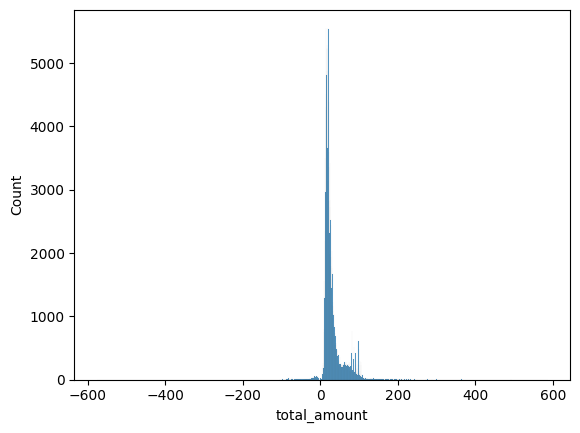

In [47]:
sns.histplot(data['total_amount'])
plt.show()

From this graph we can see that the target variable is highly left skewed which suggests that the most of the rides have total amount to be less than or equal to 50 rupees as visible from the graph.

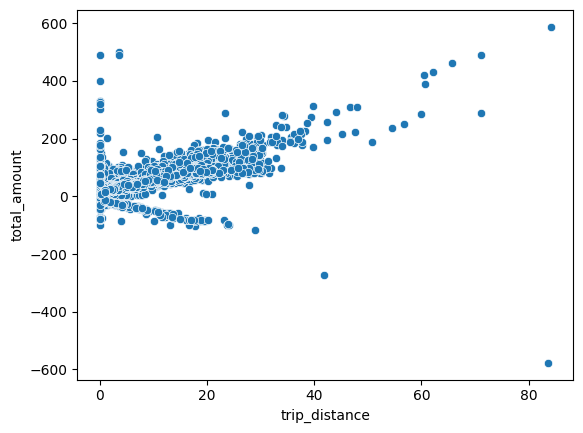

In [48]:
sns.scatterplot(x="trip_distance", y="total_amount", data=data[:50000])

plt.show()

We can see as trip distance increases trip amount too is increasing, also few rides with less trip distance having high trip amount suggests that the rider may have taken a lot of breaks in between which might have increased the trip duration resulting in high trip amount.

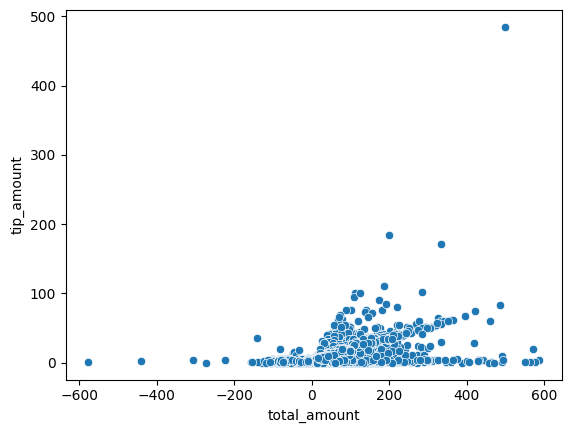

In [49]:
sns.scatterplot(x="total_amount", y="tip_amount", data=data)

plt.show()

There is no particular trend between the tip provided with overall trip amount, but we can also see for few trips with trip amount in larger side also do have greater tips for the driver.

Feature Engineering And EDA

In [50]:
##Created a new column to determine the duration between pickup time and dropoff time
# Applying Featurte engineering to datetiome columns

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

data['duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60
data['duration'] = np.abs(data['duration'])
data['duration'].head


<bound method NDFrame.head of 0         45.600000
1         63.433333
2         53.650000
3         56.866667
4         18.833333
            ...    
174995    28.583333
174996    61.400000
174997    70.033333
174998    38.366667
174999    87.983333
Name: duration, Length: 175000, dtype: float64>

In [51]:
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

# Define bins for morning, noon, and night
bins = [0, 5, 12, 17, 24]
labels = ['Night', 'Morning', 'Noon', 'Evening']

# Create a new column 'time_of_day' to store the categorized values
data['time_of_day'] = pd.cut(data['pickup_hour'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'pickup_hour' and 'time_of_day' columns
print(data[['tpep_pickup_datetime', 'pickup_hour', 'time_of_day']].head())

  tpep_pickup_datetime  pickup_hour time_of_day
0  2023-06-28 17:20:21           17     Evening
1  2023-06-29 23:05:01           23     Evening
2  2023-06-30 10:19:31           10     Morning
3  2023-06-29 13:23:09           13        Noon
4  2023-06-29 22:03:32           22     Evening


In [52]:
fare_by_time = data.groupby('time_of_day')['total_amount'].mean()
print(fare_by_time)

time_of_day
Night      31.162755
Morning    28.333503
Noon       30.701010
Evening    29.396603
Name: total_amount, dtype: float64


Night : 31.162755,
Morning : 28.333503,
Noon : 30.701010,
Evening : 29.396603

As we can see from the below graph and our fare_by_time output, at night the fare is slightly greater than other time, and at morning it is lowest.

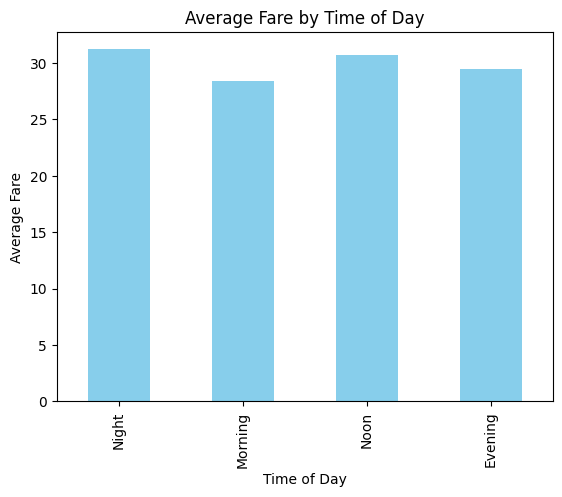

In [53]:
fare_by_time.plot(kind='bar', color='skyblue')
plt.title('Average Fare by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Fare')
plt.show()

In [54]:
data['Pickup_Year'] = data['tpep_pickup_datetime'].dt.year
data['Pickup_Month'] = data['tpep_pickup_datetime'].dt.month
data['Pickup_Day'] = data['tpep_pickup_datetime'].dt.day
data['Dropoff_Year'] = data['tpep_dropoff_datetime'].dt.year
data['Dropoff_Month'] = data['tpep_dropoff_datetime'].dt.month
data['Dropoff_Day'] = data['tpep_dropoff_datetime'].dt.day

In [55]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Airport_fee,duration,pickup_hour,time_of_day,Pickup_Year,Pickup_Month,Pickup_Day,Dropoff_Year,Dropoff_Month,Dropoff_Day
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,...,0.0,45.600000,17,Evening,2023,6,28,2023,6,28
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,...,0.0,63.433333,23,Evening,2023,6,29,2023,6,29
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,...,0.0,53.650000,10,Morning,2023,6,30,2023,6,30
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,...,0.0,56.866667,13,Noon,2023,6,29,2023,6,29
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,...,0.0,18.833333,22,Evening,2023,6,29,2023,6,29


In [56]:
# Calculate the total taxi fare per month
monthly_fares = data.groupby('Pickup_Month')['total_amount'].sum()

# Determine the month with the highest total fare
best_month = monthly_fares.idxmax()
# Determine the month with the lowest total fare
lowest_fare_month = monthly_fares.idxmin()


# Print the results
print(f"Month with the highest total taxi fare: {best_month}")
print(f"Month with the lowest total taxi fare: {lowest_fare_month}")


Month with the highest total taxi fare: 6
Month with the lowest total taxi fare: 7


As we can see, we have two months data June and July, I preformed data analysis and the Month with the highest total taxi fare is 6, whixh is June, and the Month with the lowest total taxi fare is 7, which is July.


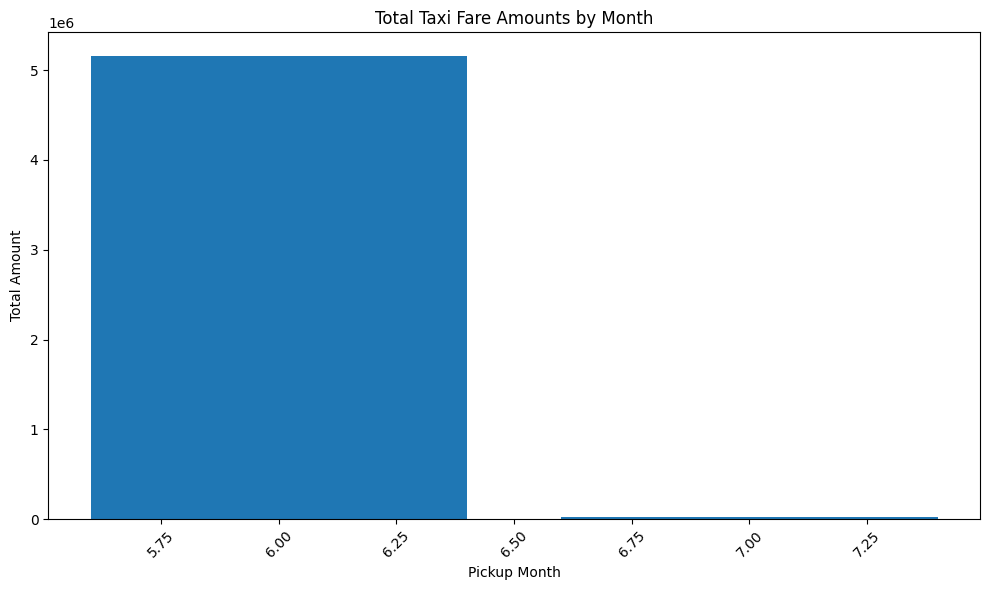

In [57]:
# Calculate the total taxi fare per month
monthly_fares = data.groupby('Pickup_Month')['total_amount'].sum()
# Convert the x-axis labels to integers
monthly_fares.index = monthly_fares.index.astype(int)
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_fares.index, monthly_fares)
plt.xlabel('Pickup Month')
plt.ylabel('Total Amount')
plt.title('Total Taxi Fare Amounts by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
data['duration'].describe()

count    175000.000000
mean         44.570096
std          47.014730
min           0.000000
25%          17.800000
50%          37.933333
75%          64.250000
max        1537.150000
Name: duration, dtype: float64

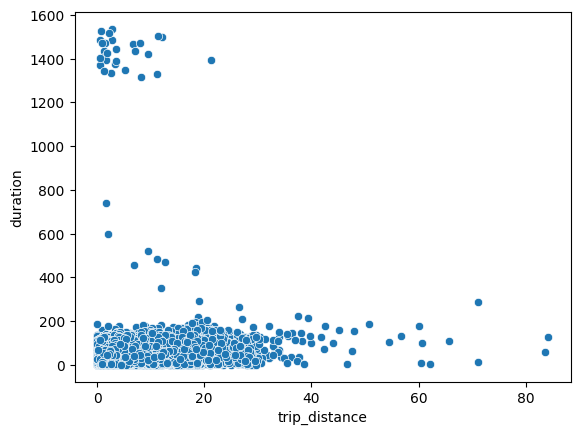

In [59]:
sns.scatterplot(x="trip_distance", y="duration", data=data[:50000])

plt.show()

I have taken a range of data for better understanding of the graph.
Here the graph shows that longer trips tend to take longer. However, there is some variations in trip duration. For example, distances between 0 to 20 km trips take mostly in between o to 200 minutes, while few take 1200 or more minutes. This variation could be due to a number of factors, such as traffic, the route, vehicle conditions etc.


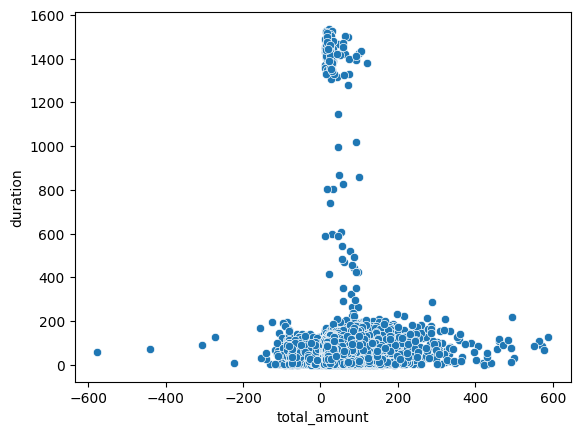

In [60]:
sns.scatterplot(x="total_amount", y="duration", data=data)

plt.show()

We can see from previous two graphs, trip_distance, duration and total_amount,duration both have same type of graphs and we can say the longer the trip is total amount is higher. Also we can see some variations.

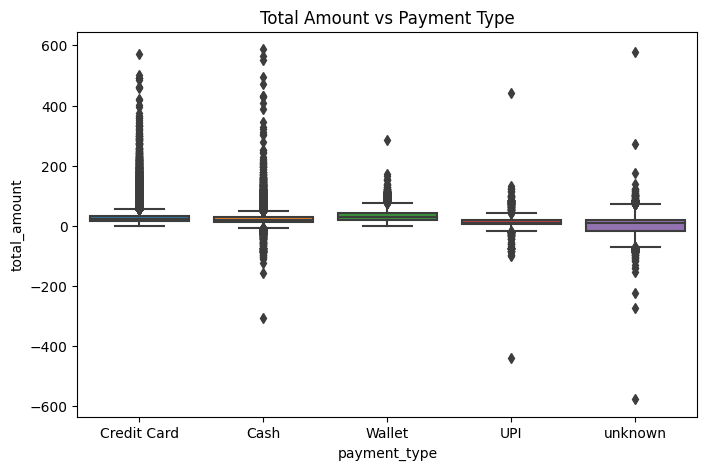

In [61]:
# Categorical variable 4: 'payment_type'
plt.figure(figsize=(8, 5))
sns.boxplot(x='payment_type', y='total_amount', data=data)
plt.title('Total Amount vs Payment Type')
plt.show()

Here we can see that the Credit Crad and Cash payment types have overlapping ranges so the model may struggle to distinguish between them. Wallet payment, UPI and unknown types are less likely to be associated with amounts bigger than 200.

<Axes: >

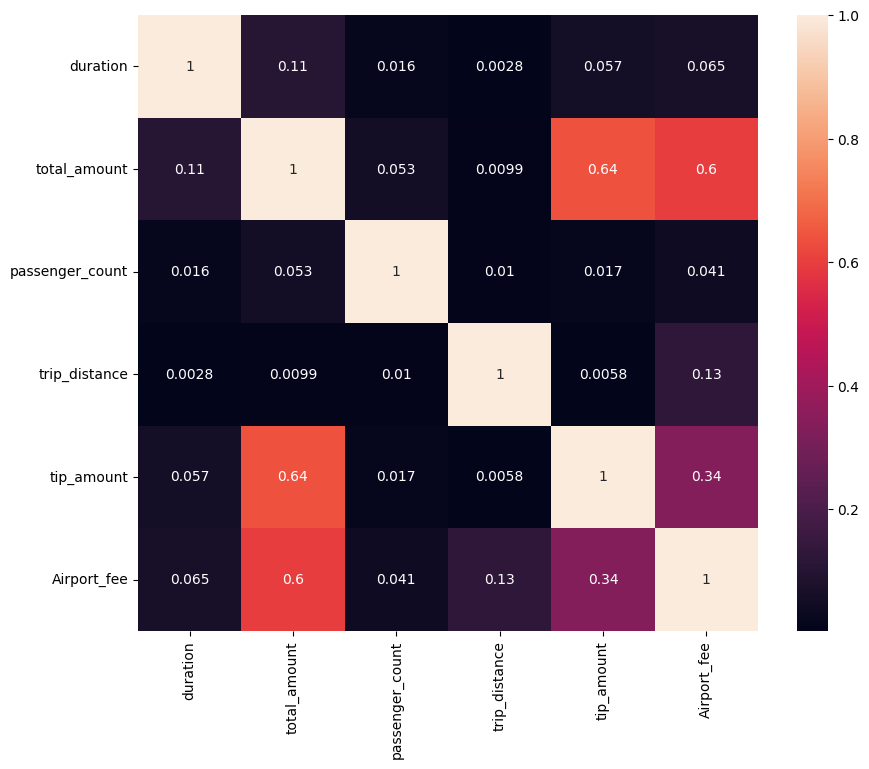

In [62]:
plt.figure(figsize=(10,8))
correlation_matrix = data[['duration', 'total_amount', 'passenger_count', 'trip_distance', 'tip_amount', 'Airport_fee']].corr()
sns.heatmap(correlation_matrix, annot=True)

We can see that there is no high collinearity between the dependent variables , therefore we don't need to treat multiicollinearity. Also we can see that between total amount and tip_amount and Airport fee there is a correlation of 0.6.

In [63]:
# dropping columns which I think is not necessary

data = data.drop(columns=['Pickup_Year', 'Dropoff_Year','time_of_day' ])
data = data.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])


Data Preprocessing 

Handeling Categorical and Numerical Columns

In [64]:
# Define categorical and numerical features
numeric_columns = data.select_dtypes(include='number').columns
catagorical_columns = data.select_dtypes(exclude='number').columns
print(numeric_columns)
print(catagorical_columns)

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'Airport_fee', 'duration', 'pickup_hour', 'Pickup_Month', 'Pickup_Day',
       'Dropoff_Month', 'Dropoff_Day'],
      dtype='object')
Index(['store_and_fwd_flag', 'payment_type'], dtype='object')


In [65]:

# # Converting type of columns to category
# Encoding the catagorical columns

data = pd.get_dummies(data, columns=['store_and_fwd_flag', 'payment_type'],drop_first=True)

In [66]:
# checking the data info after one hot encoding.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   VendorID                  175000 non-null  int64  
 1   passenger_count           168923 non-null  float64
 2   trip_distance             175000 non-null  float64
 3   RatecodeID                168923 non-null  float64
 4   PULocationID              175000 non-null  int64  
 5   DOLocationID              175000 non-null  int64  
 6   extra                     175000 non-null  float64
 7   tip_amount                175000 non-null  float64
 8   tolls_amount              175000 non-null  float64
 9   improvement_surcharge     175000 non-null  float64
 10  total_amount              175000 non-null  float64
 11  congestion_surcharge      168923 non-null  float64
 12  Airport_fee               168923 non-null  float64
 13  duration                  175000 non-null  f

In [67]:
data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,pickup_hour,Pickup_Month,Pickup_Day,Dropoff_Month,Dropoff_Day,store_and_fwd_flag_Y,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
0,1,1.0,2.14,1.0,120,9,2.5,7.165589,0.0,1.0,...,17,6,28,6,28,False,True,False,False,False
1,0,1.0,2.70,1.0,15,215,3.5,6.067401,0.0,1.0,...,23,6,29,6,29,False,True,False,False,False
2,1,1.0,1.15,1.0,167,223,0.0,4.111547,0.0,1.0,...,10,6,30,6,30,False,True,False,False,False
3,0,1.0,0.40,1.0,128,239,2.5,6.411079,0.0,1.0,...,13,6,29,6,29,False,True,False,False,False
4,1,3.0,1.10,1.0,203,52,1.0,4.769377,0.0,1.0,...,22,6,29,6,29,False,True,False,False,False


Handeling Missing Values 

In [68]:
columns_with_nan = data.columns[data.isnull().any()].tolist()

print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['passenger_count', 'RatecodeID', 'congestion_surcharge', 'Airport_fee']


In [69]:
# # Handle missing values, replacing with mean
data['passenger_count'] = data['passenger_count'].fillna(data['passenger_count'].mean())
data['RatecodeID'] = data['RatecodeID'].fillna(data['RatecodeID'].mean())
data['congestion_surcharge'] = data['congestion_surcharge'].fillna(data['congestion_surcharge'].mean())
data['Airport_fee'] = data['Airport_fee'].fillna(data['Airport_fee'].mean())




In [70]:
##Standard Scaling the dataset using pipeline
# Create a Pipeline with the specified preprocessing steps

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Fit and transform the pipeline on the entire DataFrame
data_scaled = pipeline.fit_transform(data)

# Create a new DataFrame with the scaled data
data = pd.DataFrame(data_scaled, columns=data.columns)

# Print the scaled DataFrame
print(data)
data.head()

        VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0        0.60956        -0.408463      -0.007611   -0.080979     -0.166915   
1       -1.63458        -0.408463      -0.006193   -0.080979     -1.545798   
2        0.60956        -0.408463      -0.010117   -0.080979      0.450299   
3       -1.63458        -0.408463      -0.012016   -0.080979     -0.061857   
4        0.60956         1.875507      -0.010244   -0.080979      0.923059   
...          ...              ...            ...         ...           ...   
174995   0.60956         1.875507      -0.004294   -0.080979      0.187655   
174996   0.60956        -0.408463       0.010872   -0.080979      0.279580   
174997  -1.63458        -0.408463      -0.006952   -0.080979      0.463432   
174998   0.60956        -0.408463      -0.001104   -0.080979      1.408951   
174999   0.60956        -0.408463      -0.010472   -0.080979      0.266448   

        DOLocationID     extra  tip_amount  tolls_amount  \
0  

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,pickup_hour,Pickup_Month,Pickup_Day,Dropoff_Month,Dropoff_Day,store_and_fwd_flag_Y,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
0,0.60956,-0.408463,-0.007611,-0.080979,-0.166915,-1.623543,0.291434,0.225142,-0.27781,0.102183,...,0.326181,-0.065342,-0.537045,-0.08827,-0.376549,-0.082884,0.542064,-0.082814,-0.189671,-0.116239
1,-1.63458,-0.408463,-0.006193,-0.080979,-1.545798,1.080143,0.804651,-0.013034,-0.27781,0.102183,...,1.365627,-0.065342,-0.030931,-0.08827,0.011756,-0.082884,0.542064,-0.082814,-0.189671,-0.116239
2,0.60956,-0.408463,-0.010117,-0.080979,0.450299,1.185141,-0.991610,-0.437221,-0.27781,0.102183,...,-0.886505,-0.065342,0.475183,-0.08827,0.400060,-0.082884,0.542064,-0.082814,-0.189671,-0.116239
3,-1.63458,-0.408463,-0.012016,-0.080979,-0.061857,1.395136,0.291434,0.061504,-0.27781,0.102183,...,-0.366783,-0.065342,-0.030931,-0.08827,0.011756,-0.082884,0.542064,-0.082814,-0.189671,-0.116239
4,0.60956,1.875507,-0.010244,-0.080979,0.923059,-1.059181,-0.478392,-0.294551,-0.27781,0.102183,...,1.192386,-0.065342,-0.030931,-0.08827,0.011756,-0.082884,0.542064,-0.082814,-0.189671,-0.116239


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   VendorID                  175000 non-null  float64
 1   passenger_count           175000 non-null  float64
 2   trip_distance             175000 non-null  float64
 3   RatecodeID                175000 non-null  float64
 4   PULocationID              175000 non-null  float64
 5   DOLocationID              175000 non-null  float64
 6   extra                     175000 non-null  float64
 7   tip_amount                175000 non-null  float64
 8   tolls_amount              175000 non-null  float64
 9   improvement_surcharge     175000 non-null  float64
 10  total_amount              175000 non-null  float64
 11  congestion_surcharge      175000 non-null  float64
 12  Airport_fee               175000 non-null  float64
 13  duration                  175000 non-null  f

Data Splitting And Model Trainings. 
Taking total_amount column as the target variable. 
Splitting the Train dataset into train and validation set in a 80-20 ratio.

In [72]:
#data splitting, train data and validation features

X = data.loc[:, data.columns != 'total_amount']
y = data['total_amount']

X_train, X_valid, y_train, y_valid = train_test_split(X,y,  test_size=0.20, random_state=42)

In [73]:
## Baseline Model, Linear Regression
model = LinearRegression()
reg = model.fit(X, y)
reg.score(X, y)

0.726322446170379

In [74]:
##Cross validation score for linear Regression

from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(score)

[0.72313801 0.72665398 0.74744262 0.73186848 0.69946284]


In [75]:
#starting with prediction 

y_pred = model.predict(X_valid)
lr_r2 = r2_score(y_valid, y_pred)
print(lr_r2)

0.7242382017474027


Linear Regression (R2 Score: 0.72):

The linear regression model has a moderate fit to the data. An R2 score of 0.72 suggests that 72% of the variance in the target variable is explained by the model.

KNN Algorithm

In [ ]:
# KNN model training for multiple n_neighbours values to compare

neighbor_values = [1, 5, 10, 20, 50, 100]

for n_neighbors in neighbor_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_regressor.fit(X, y)
    y_pred = knn_regressor.predict(X_valid)

    knn_r2 = r2_score(y_valid, y_pred)

    print(f"Number of Neighbors: {n_neighbors}, r2_score: {knn_r2}")

Number of Neighbors: 1, r2_score: 1.0
Number of Neighbors: 5, r2_score: 0.8416489154510137


We can see that when n_neighbours = 5,  we are getting the best score. At 1 the model is overfitting. As we increase the value of the neighbours r2 score is keep decreasing as we can see it on the below graph.

In [ ]:
# visualise the r2 scores of knn algorithm 

import matplotlib.pyplot as plt

n_neighbors_values = [1, 5, 10, 20, 50, 100]
r2_scores = [1.0, 0.8403, 0.8140, 0.7962, 0.7799, 0.7651]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, r2_scores, marker='o', linestyle='-')
plt.title('R-squared Scores vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('R-squared Score')
plt.grid(True)
plt.show()

SVM Algorithm

In [ ]:
# ## SVM Model

# # Create an SVM regressor
# svr = SVR(kernel='linear') 
# # Train the SVM regressor
# svr.fit(X,y)

# # Make predictions on the test set
# y_pred = svr.predict(X_valid)

# #Evaluate the performance (using r2_score)
# r2 = r2_score(y_valid,y_pred)
# print(r2)

Decision Tree Algorithm

In [ ]:
# Decision Tree Grid search for hyperparameter tuning

# regressor = DecisionTreeRegressor()
# param_grid={"splitter":["best","random"],
            
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           
#            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# # Use GridSearchCV to search the grid of hyperparameters
# grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
#                            cv=3, verbose=2)

# # Fit the grid search model
# grid_search.fit(X, y)

# # Get the best parameters
# best_params_grid = grid_search.best_params_
# print("Best Hyperparameters (Grid Search):", best_params_grid)


In [ ]:
##Decision Tree Regressor....


# Create a DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)

# Fit the model to your data
regressor.fit(X, y)

# Use cross_val_predict for predictions and performance evaluation
DTy_pred = regressor.predict(X_valid)

# Print the R^2 score
r2 = r2_score(y_valid, DTy_pred)
print("R^2 Score:", r2)


Decision Tree (R2 Score: 1.00):

The Decision Tree model has a perfect R2 score of 1.00, indicating that it perfectly predicts the target variable. This is a sign of overfitting, because the score is obtained on the training data. 

Decision Tree (Cross Validated R2 score: 0.90316467): 

From the below model training, the Decision Tree model has a score of 0.90 on Cross validation , indicating that it's performing well on the training data.

In [ ]:
# Cross val score

DT_scores = cross_val_score(regressor, X, y, cv=10, scoring='r2')

# Calculate the mean R^2 score
mean_r2_score = DT_scores.mean()

# Print the mean R^2 score
print("Mean R^2 Score (Cross-validated):", mean_r2_score)


Random Forest Algorithm

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# import scipy.stats as stats
# from sklearn.model_selection import RandomizedSearchCV

# # Create a base model
# rf = RandomForestRegressor()

# # Define the grid of hyperparameters
# param_dist = {
# #     'n_estimators': stats.randint(200, 400),
    
#     'max_depth': [5,10,15,18,20],
#     'min_samples_split': [5,10,13,15,20],
#     'min_samples_leaf': [2,5,10]
# }
    


# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
#                                       n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42)

# # Fit the cuML grid search model
# random_search.fit(X, y)

# # Get the best parameters
# best_params_grid = random_search.best_params_
# print("Best Hyperparameters (Grid Search):", best_params_grid)


In [ ]:
##random forest

# 1. tuning 1 = Best Hyperparameters (cuML Grid Search): {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}
# 2. tuning 2 = Best Hypermeters (Grid Search): {{'max_depth': 20, 'min_samples_split': 15 , 'n_estimators': 250}}
# 3. tuning 3 = Best Hyperparameters (Grid Search): {'max_depth': 29, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 250}
# 4. tuning 4 = Best Hyperparameters (Grid Search): {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 13}
# 5. tuning 5 = Best Hyperparameters (Grid Search): {'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 5}

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Create a random forest model
regr = RandomForestRegressor(n_estimators=250, max_depth=16, min_samples_split=5, min_samples_leaf=2, oob_score=True)
regr.fit(X, y)

# Make predictions on the validation set
y_pred = regr.predict(X_valid)

# Evaluate the model using R^2 score
rf_r2 = r2_score(y_valid, y_pred)
print(f"R^2 Score: {rf_r2}") 



Random Forest algorithm is wroking best with this dataset.
best score for random forest regressor R^2 Score: 0.9804800660969516


XGB Algorithm

In [ ]:
# # ##XGBoosting
# from xgboost import XGBRegressor
# # Create an XGBoost regressor
# xgb_model = XGBRegressor(objective='reg:squarederror')


# # Define the parameter grid to search
# param_grid = {
#     'min_child_weight': [1, 5, 7],
#     'gamma': [0.5, 1, 1.3, 1.5, 2],
#     'max_depth': [4, 5, 7, 9],
#     'learning_rate': [0.01, 0.03, 0.05, 0.07],
# #     'n_estimators': [200, 250, 300, 310, 320]
# }



# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')


# # Fit the model
# grid_search.fit(X, y)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)


In [ ]:
# ##XGBoosting
from sklearn.model_selection import cross_val_predict
from xgboost import XGBRegressor
# Create an XGBoost regressor
xgb_model = XGBRegressor(objective='reg:squarederror')
best_params = {'objective': 'reg:squarederror', 'gamma': 1.5, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 250}
# Create an XGBoost regressor with the best hyperparameters
optimal_xgb_model = XGBRegressor(**best_params)

# Fit the model to your training data
optimal_xgb_model.fit(X, y)

# Make predictions on the validation set
y_pred = optimal_xgb_model.predict(X_valid)

# Evaluate the model using R^2 score
xgb_r2 = r2_score(y_valid, y_pred)
print(f"R^2 Score: {xgb_r2}") 

As we can see XGB model is also working fine with the dataset. Best score for xgb regressor R^2 Score: 0.969982878568078

AdaBoost Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaregr = AdaBoostRegressor(random_state=42, n_estimators=200)
adaregr.fit(X, y)

# Make predictions on the validation set
y_pred = adaregr.predict(X_valid)

# Evaluate the model using R^2 score
ada_r2 = r2_score(y_valid, y_pred)
print(f"R^2 Score: {ada_r2}") 

Without Hyperparameter Tuning, R2 score of approximately 0.62 for AdaBoost model indicates that the model is able to explain a substantial portion of the variance in the target variable. But not the best.

Prediction On the Test data

Feature Engineering for Test Data

In [ ]:
test_data['tpep_pickup_datetime'] = pd.to_datetime(test_data['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
test_data['tpep_dropoff_datetime'] = pd.to_datetime(test_data['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

test_data['duration'] = (test_data['tpep_dropoff_datetime'] - test_data['tpep_pickup_datetime']).dt.total_seconds() / 60
test_data['duration'] = np.abs(test_data['duration'])
test_data['duration'].head

In [ ]:

test_data['Pickup_Year'] = test_data['tpep_pickup_datetime'].dt.year
test_data['Pickup_Month'] = test_data['tpep_pickup_datetime'].dt.month
test_data['Pickup_Day'] = test_data['tpep_pickup_datetime'].dt.day
test_data['Dropoff_Year'] = test_data['tpep_dropoff_datetime'].dt.year
test_data['Dropoff_Month'] = test_data['tpep_dropoff_datetime'].dt.month
test_data['Dropoff_Day'] = test_data['tpep_dropoff_datetime'].dt.day

In [ ]:
test_data = test_data.drop(columns=['Pickup_Year', 'Dropoff_Year' ])
test_data = test_data.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])


In [ ]:
numeric_columns = test_data.select_dtypes(include='number').columns
catagorical_columns = test_data.select_dtypes(exclude='number').columns
print(numeric_columns)
print(catagorical_columns)

In [ ]:
# # Converting type of columns to category

test_data = pd.get_dummies(test_data, columns=['store_and_fwd_flag', 'payment_type'],drop_first=True)

In [ ]:
columns_with_nan = test_data.columns[test_data.isnull().any()].tolist()

print("Columns with NaN values:", columns_with_nan)

In [ ]:
test_data['passenger_count'] = test_data['passenger_count'].fillna(test_data['passenger_count'].mean())
test_data['RatecodeID'] = test_data['RatecodeID'].fillna(test_data['RatecodeID'].mean())
test_data['congestion_surcharge'] = test_data['congestion_surcharge'].fillna(test_data['congestion_surcharge'].mean())
test_data['Airport_fee'] = test_data['Airport_fee'].fillna(test_data['Airport_fee'].mean())

Scaling for Test Data

In [ ]:
##Standard Scaling the dataset using pipeline

# Create a Pipeline with the specified preprocessing steps
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Fit and transform the pipeline on the entire DataFrame
data_scaled = pipeline.fit_transform(test_data)

# Create a new DataFrame with the scaled data
test_data = pd.DataFrame(data_scaled, columns=test_data.columns)

# Print the scaled DataFrame
print(test_data)
data.head()

In [ ]:
test_data.info()

Prediction on the Test Data

In [ ]:
predictions = regr.predict(test_data)

In [ ]:
len(predictions)

In [ ]:
test_data['ID'] = range(1, len(test_data) + 1)

In [ ]:

test_data.info()

In [ ]:
submission = pd.DataFrame({'ID': test_data['ID'], 'total_amount': predictions})


In [ ]:

# Save the DataFrame to a CSV file


# try:
#     submission.to_csv('submission.csv', index=False)
# except Exception as e:
#     print("Error:", e)

Comparison of three best models

In [ ]:
model_scores = {
    'Model': [ 'KNN', 'Decision Tree' , 'Random Forest', 'XGBoost'],
    'R2 Score': [ 0.85, 0.90, 0.98, 0.96]
}

ms = pd.DataFrame(model_scores)
print(ms)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ms['Model'], ms['R2 Score'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different Models')
plt.ylim(0, 1)  # Set the y-axis range between 0 and 1 if necessary
plt.show()

In [ ]:

KNN (R2 Score: 0.85):

The KNN model shows a good fit to the data, with an R2 score of 0.85. This indicates that 85% of the variance in the target variable is captured by the KNN model.

Decision Tree (R2 Score: 0.90):
    
The Decision Tree model has a score of 0.90. This indicates that the Decision Tree model is performing well on your validation set and is able to explain 90% of the variance.


Random Forest (R2 Score: 0.98):

The Random Forest model performs exceptionally well with an R2 score of 0.98. This ensemble model combines multiple decision trees, often reducing overfitting compared to a single decision tree.

XGBoost (R2 Score: 0.96):

XGBoost also demonstrates strong predictive performance with an training R2 score of 0.96. It is a powerful gradient boosting algorithm known for its efficiency and effectiveness.

As, Random Forest and XGB both are performing well on train and test dataset, we can say both are best fitted model for this dataset.